In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVC,SVC
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay

In [2]:
initial_df=pd.read_csv('original_data_with_encoding.csv')
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

### Data Without ReSampling

In [3]:
X = initial_df.drop('target',axis=1).values
Y = initial_df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [4]:
svm_clf = LinearSVC(random_state=48) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred=svm_clf.predict(test_sc)

Time taken to fit the model in sec is  199.53473730000042


In [5]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.9630
F1 score : 0.0000
Recall score : 0.0000
Precision score : 0.0000


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

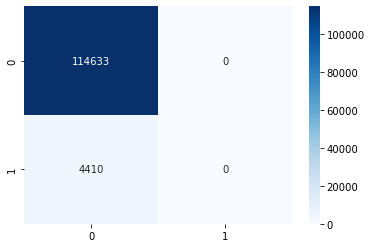

In [6]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114633
           1       0.00      0.00      0.00      4410

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Data with Resampling and without OneHotEncoding

In [8]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [9]:
svm_clf = LinearSVC(random_state=48) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred=svm_clf.predict(test_sc)

Time taken to fit the model in sec is  409.4459212999973


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.8570
F1 score : 0.8383
Recall score : 0.7395
Precision score : 0.9676


<AxesSubplot:>

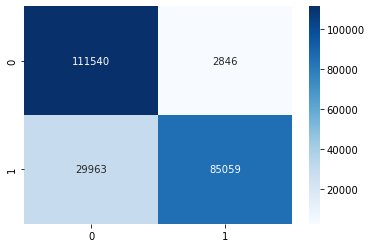

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='Blues')

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    114386
           1       0.97      0.74      0.84    115022

    accuracy                           0.86    229408
   macro avg       0.88      0.86      0.86    229408
weighted avg       0.88      0.86      0.86    229408



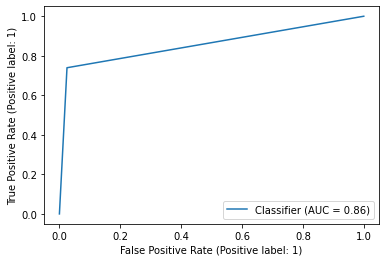

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)

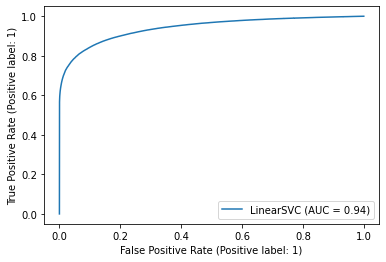

In [14]:
RocCurveDisplay.from_estimator(svm_clf, test_sc, y_test)

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn import svm
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, Y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(np.arange(X.shape[-1]) - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

C:\Users\RAGHAV~1\AppData\Local\Temp/ipykernel_20652/3494948829.py:6: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)
C:\Users\RAGHAV~1\AppData\Local\Temp/ipykernel_20652/3494948829.py:7: RuntimeWarning: invalid value encountered in true_divide
  scores /= scores.max()


### Data with Resampling and with OneHotEncoding

In [9]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test2,y_train,y_test2=train_test_split(X,Y,test_size=0.2,random_state=10)
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test2)

In [10]:
svm_clf = LinearSVC(random_state=48) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(test_sc)

Time taken to fit the model in sec is  188.78854190000004


In [12]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


<AxesSubplot:>

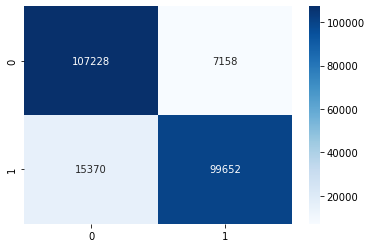

In [13]:
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True,fmt='', cmap='Blues')

In [14]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408



In [ ]:
RocCurveDisplay.from_predictions(y_test, y_pred)

In [ ]:
RocCurveDisplay.from_estimator(svm_clf, test_sc, y_test)

### OneHotEncoding improved accuracy

In [15]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(test_sc)

Time taken to fit the model in sec is  64.24129019999998


In [17]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


In [18]:
svm_clf = LinearSVC(random_state=48,dual=False,max_iter=3000) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)
y_pred2=svm_clf.predict(test_sc)

Time taken to fit the model in sec is  64.47007959999996


In [20]:
print(f"Accuracy score: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score: 0.9018
F1 score : 0.8984
Recall score : 0.8664
Precision score : 0.9330


* Changing dual and maxiter has no impact on accuracy score
* Dual=False can resolve the convergence warning

### Performing Cross Validation

In [23]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(svm_clf, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  65.19228939999994
Time taken to perform cv for the model in sec is  596.9197777000002
Cv2 scores: [0.05488911 0.6682243  0.67090947 0.66442321 0.66982843 0.67007253
 0.67017428 0.67027889 0.67383591 0.66982555]
Mean 5-Fold R Squared: 0.6082461676167825


In [29]:
svm_clf = LinearSVC(random_state=48,dual=False) 
start_time = timeit.default_timer()
svm_clf.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(svm_clf, X, Y, cv=5,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  66.21286610000243
Time taken to perform cv for the model in sec is  257.3644861000066
Cv2 scores: [0.36410239 0.66691513 0.66921672 0.66935621 0.67082086]
Mean 5-Fold R Squared: 0.6080822606911251


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise